# Курсовая работа ТМО

# Задание
1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

## 1) Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных https://archive.ics.uci.edu/ml/datasets/Air+quality#

Содержит ответы газового мультисенсорного устройства, развернутого на месторождении в итальянском городе. Среднечасовые значения откликов регистрируются вместе с эталонами концентрации газа на сертифицированном анализаторе.

Датасет состоит из 1 файла:
- AirQualityUCI.csv - датасет

Файл содержит следующие колонки:
1. Дата (ДД / ММ/ гггг).
2. Время (чч. мм. СС).
3. Истинная часовая усредненная концентрация CO в мг / м^3 (эталонный анализатор).
4. ПТ08.S1 (оксид олова) часовой усредненный отклик датчика (номинально Co-таргетированный).
5. Истинная почасовая усредненная общая концентрация Неметановых углеводородов в мкг / м^3 (эталонный анализатор).
6. Истинная почасовая усредненная концентрация бензола в мкг / м^3 (эталонный анализатор).
7. ПТ08.S2 (titania) часовой усредненный отклик датчика (номинально nmhc-таргетинг).
8. Истинная почасовая усредненная концентрация NOx в ppb (эталонный анализатор).
9. ПТ08.S3 (оксид вольфрама) ежечасно усредненный отклик датчика (номинально направленный на NOx).
10. Истинная часовая усредненная концентрация NO2 в микрог / М^3 (эталонный анализатор).
11. ПТ08.S4 (оксид вольфрама) часовой усредненный отклик датчика (номинально No2)).
12. ПТ08.S5 (оксид индия) часовой усредненный отклик датчика (номинально направленный на O3).
13. Температура в °C.
14. Относительная Влажность Воздуха (%).
15. Абсолютная влажность воздуха.

В рассматриваемом примере будем решать обе задачи - и задачу классификации, и задачу регрессии:
- Для решения **задачи классификации** в качестве целевого признака будем использовать "Occupancy". Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.
- Для решения **задачи регрессии** в качестве целевого признака будем использовать "Light".

### Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from gmdhpy import gmdh
import datetime
import time
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [3]:
data = pd.read_csv('AirQualityUCI.csv', sep=";")

## 2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

#### Основные характеристики датасетов

In [4]:
# Первые 5 строк датасета
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
# Проверим наличие пустых значений
data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [6]:
# Обработаем данные
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
data = data.dropna(how='any', axis=0) 
data = data.drop(data[(data == -200).sum(axis=1) > 0].index)
data['Date'] = data['Date'].apply(lambda it: datetime.datetime.strptime(it, '%d/%m/%Y'))
data['Time'] = data['Time'].apply(lambda it: datetime.datetime.strptime(it, '%H.%M.%S'))
data['CO(GT)'] = data['CO(GT)'].apply(lambda it: float(it.replace(',', '.')))
data['C6H6(GT)'] = data['C6H6(GT)'].apply(lambda it: float(it.replace(',', '.')))
data['T'] = data['T'].apply(lambda it: float(it.replace(',', '.')))
data['RH'] = data['RH'].apply(lambda it: float(it.replace(',', '.')))
data['AH'] = data['AH'].apply(lambda it: float(it.replace(',', '.')))

In [7]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1900-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,1900-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,1900-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,1900-01-01 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,1900-01-01 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [8]:
# Размер обучающего датасета
data.shape

(851, 15)

In [9]:
# Список колонок
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [10]:
# Список колонок с типами данных 
data.dtypes

Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [11]:
# Проверим наличие пустых значений
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Вывод. Представленный набор данных содержит пропуски. Удаляем строки с пропусками.

Построим некоторые графики для понимания структуры данных.

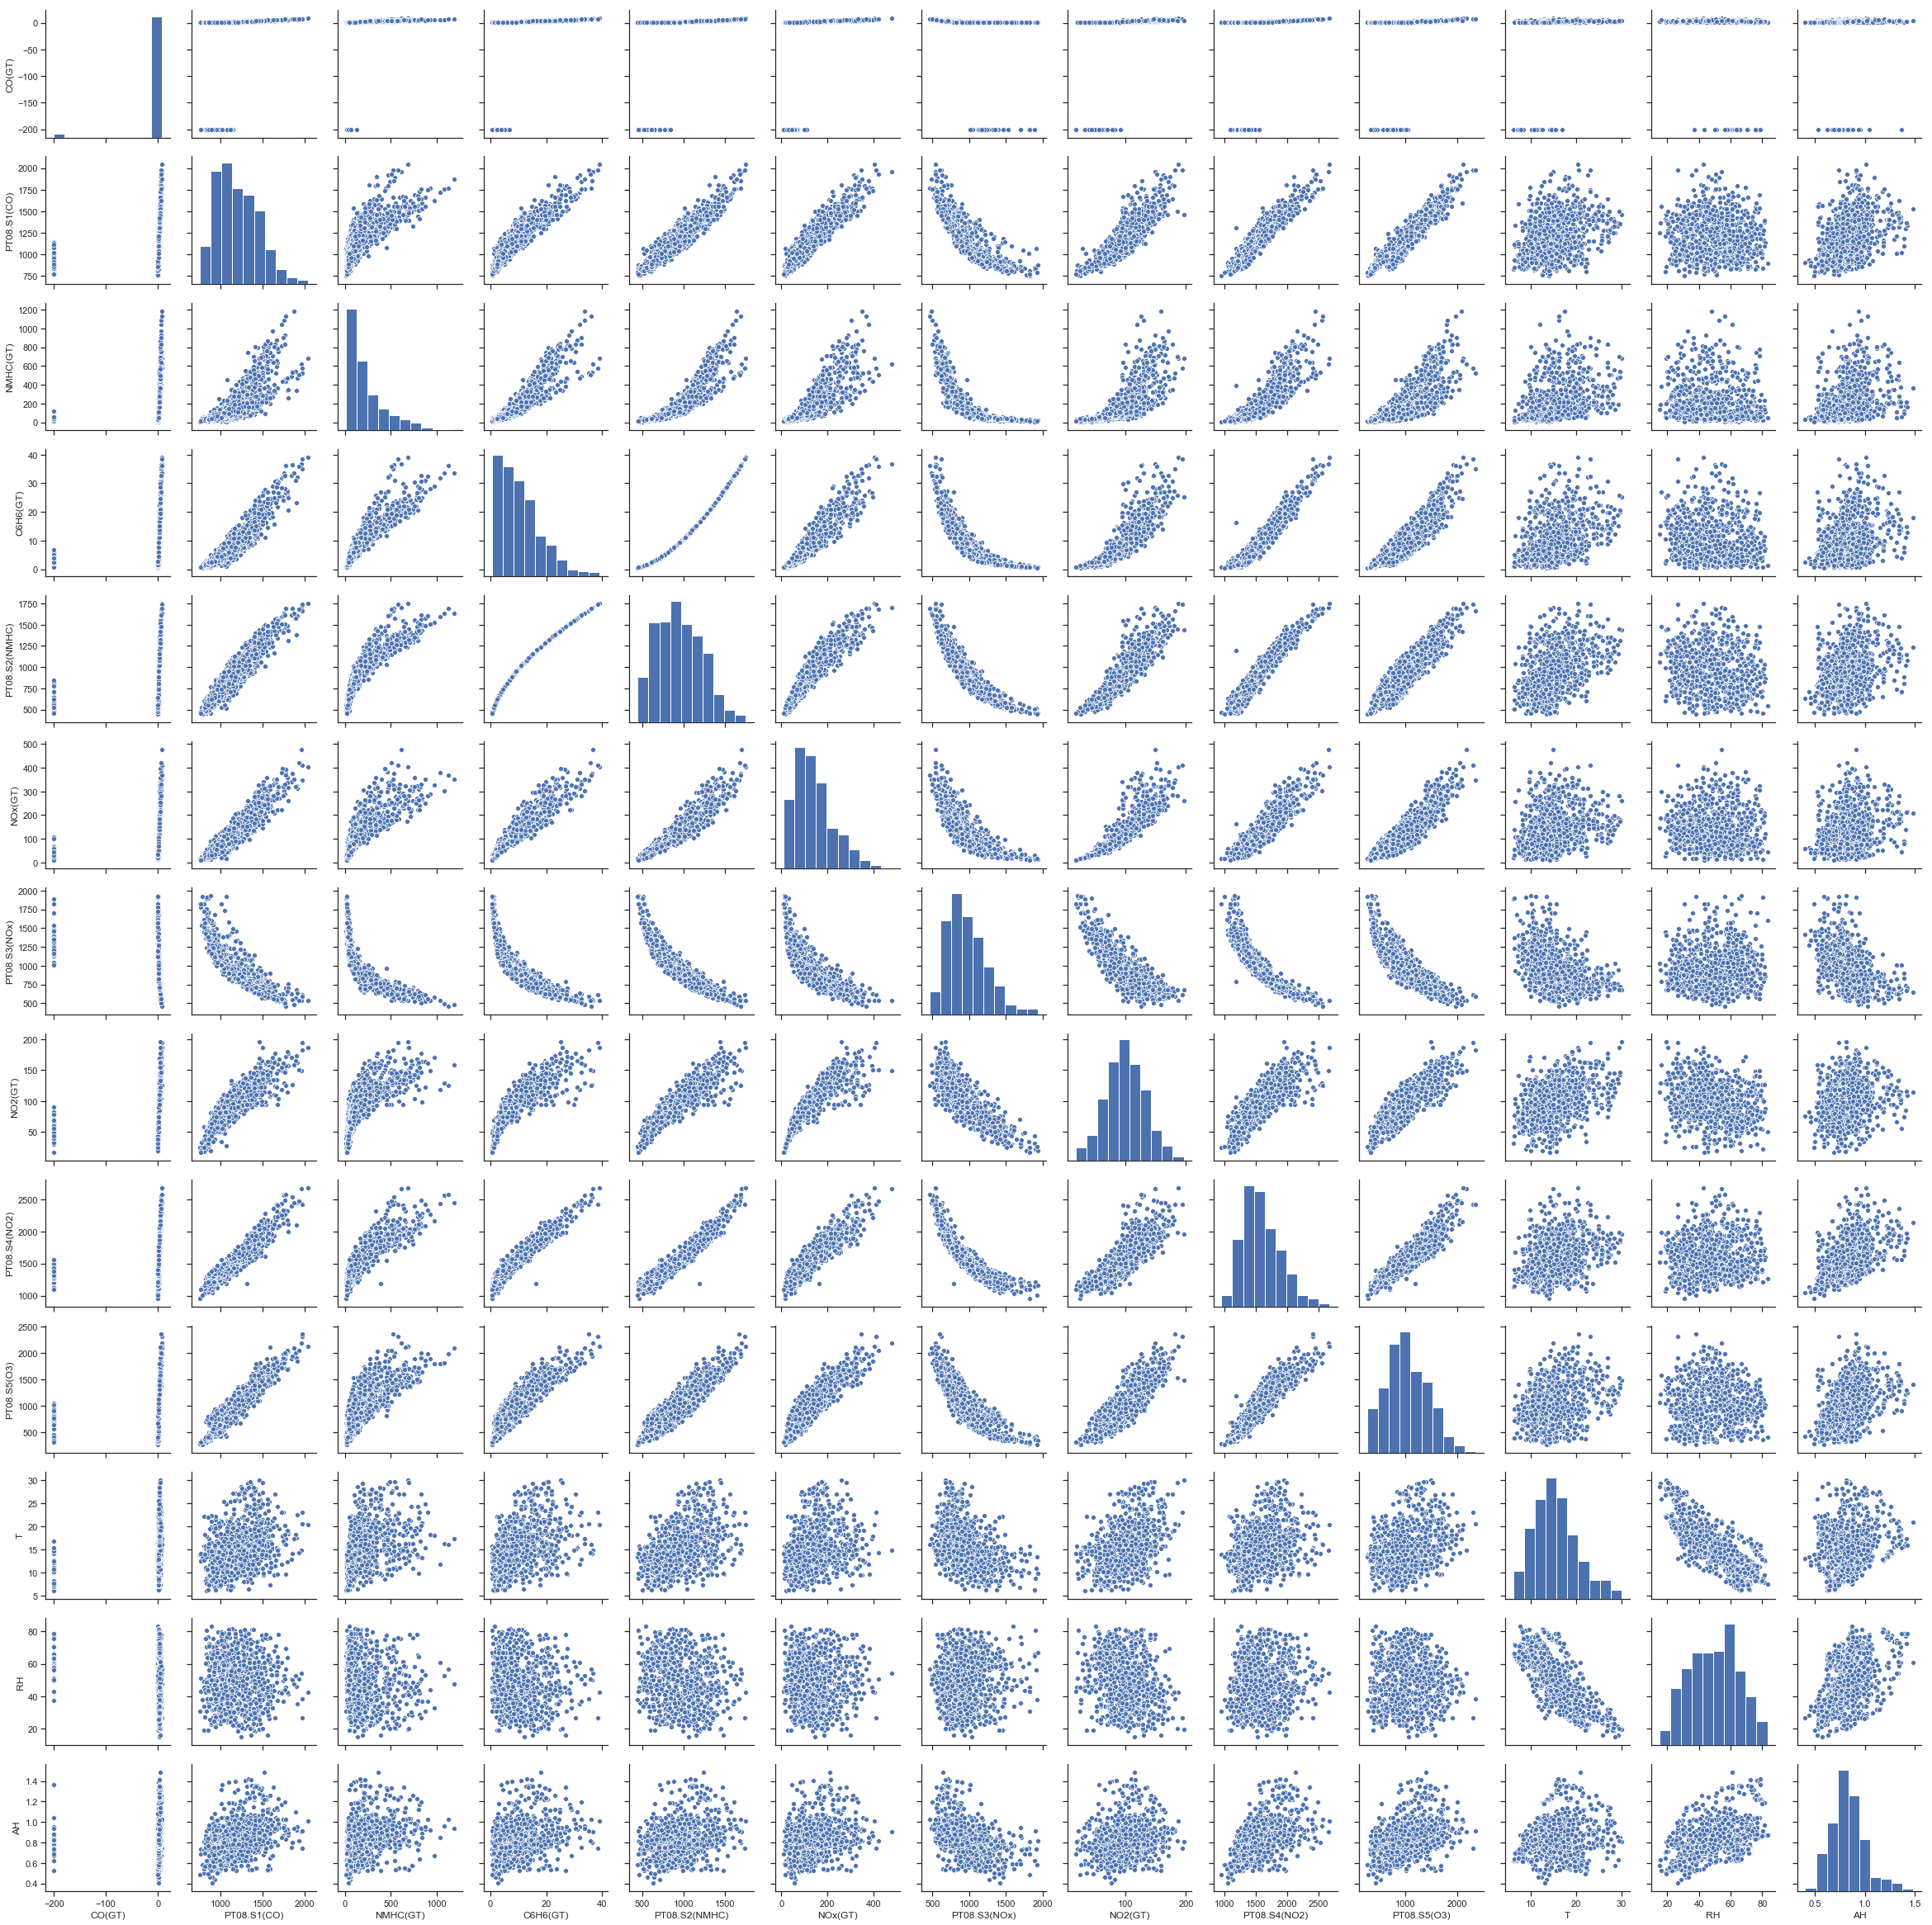

In [12]:
# Парные диаграммы
sns.pairplot(data)

In [13]:
num_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


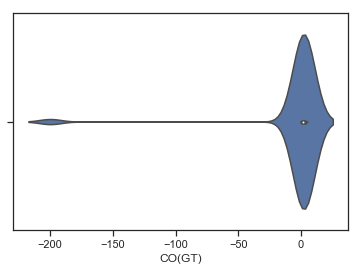

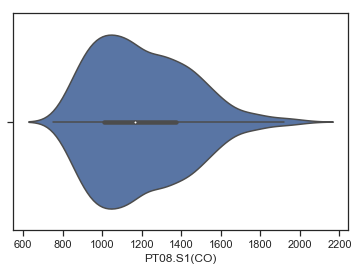

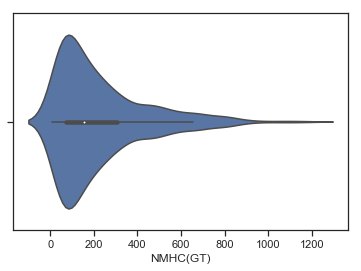

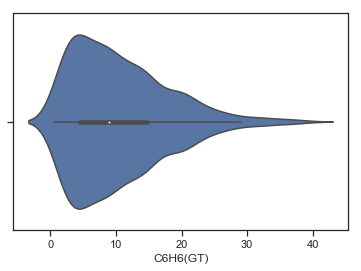

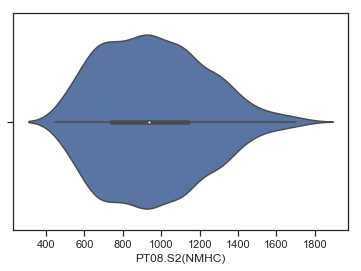

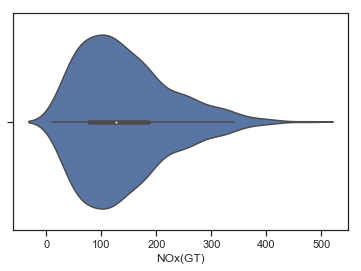

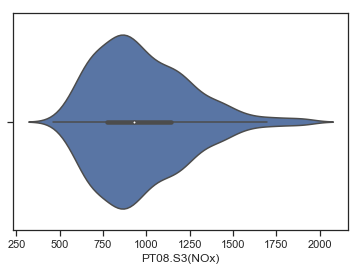

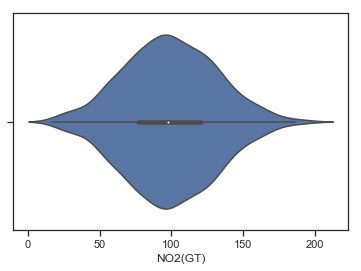

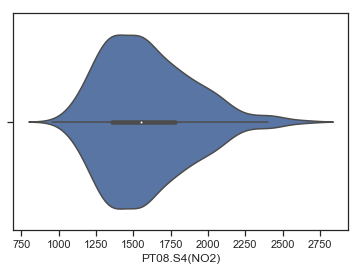

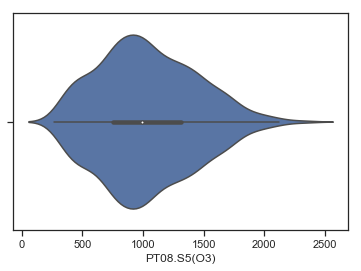

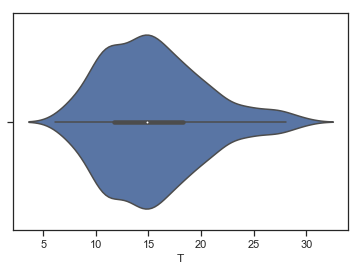

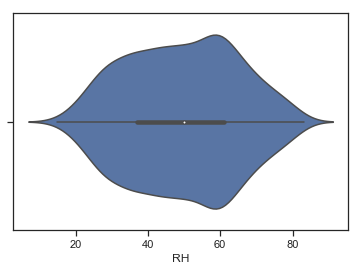

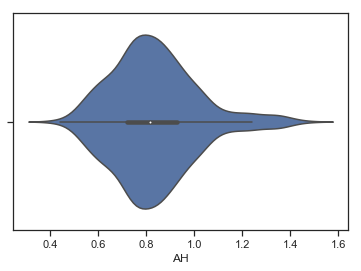

In [14]:
# Скрипичные диаграммы для числовых колонок
for col in num_cols:
    sns.violinplot(x=data[col])
    plt.show()

## 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [15]:
data.dtypes

Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

Для построения моделей будем использовать все признаки кроме признаков date time, потому что мы не рассматриваем наши данные как временной ряд.

Категориальные признаки отсутствуют, их кодирования не требуется. 

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

In [16]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1900-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,1900-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,1900-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,1900-01-01 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,1900-01-01 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [17]:
# Числовые колонки для масштабирования
scale_cols = num_cols

In [18]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [19]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [20]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,C6H6(GT)_scaled,PT08.S2(NMHC)_scaled,NOx(GT)_scaled,PT08.S3(NOx)_scaled,NO2(GT)_scaled,PT08.S4(NO2)_scaled,PT08.S5(O3)_scaled,T_scaled,RH_scaled,AH_scaled
0,2004-03-10,1900-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,...,0.294574,0.457887,0.333333,0.403664,0.536313,0.427494,0.479485,0.313808,0.497804,0.328285
1,2004-03-10,1900-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,...,0.229974,0.388208,0.198718,0.483718,0.418994,0.350348,0.338263,0.301255,0.480234,0.298458
2,2004-03-10,1900-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,...,0.219638,0.375957,0.258547,0.460651,0.541899,0.348028,0.386927,0.242678,0.572474,0.321267
3,2004-03-10,1900-01-01 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,...,0.224806,0.382848,0.346154,0.428087,0.586592,0.364849,0.448473,0.205021,0.660322,0.354973
4,2004-03-10,1900-01-01 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,...,0.155039,0.297090,0.258547,0.504749,0.553073,0.310325,0.404103,0.213389,0.654466,0.356912


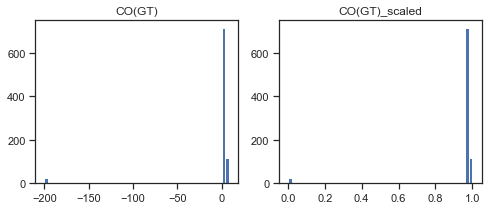

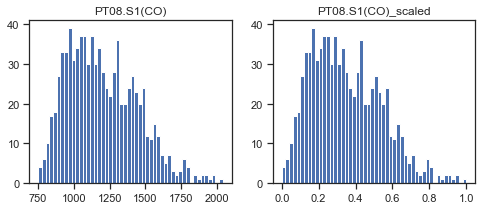

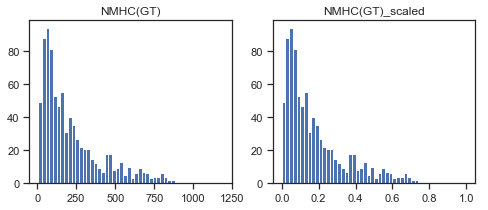

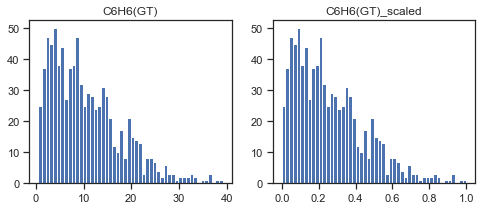

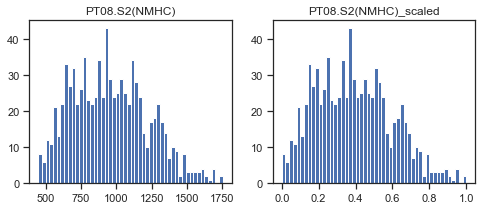

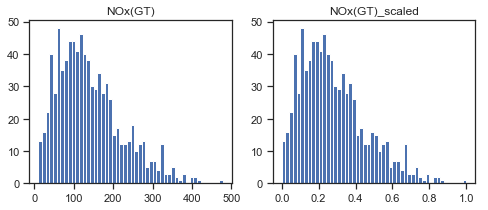

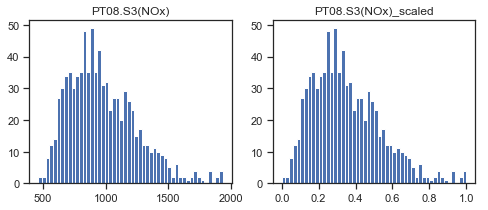

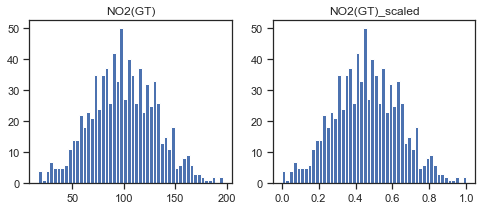

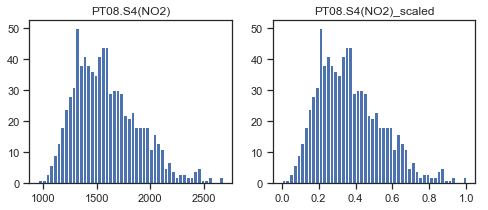

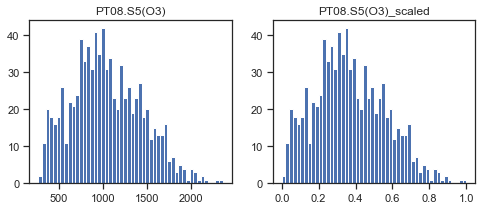

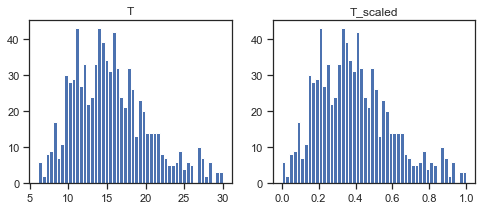

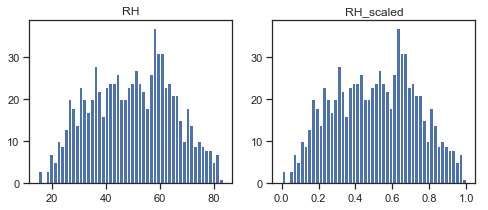

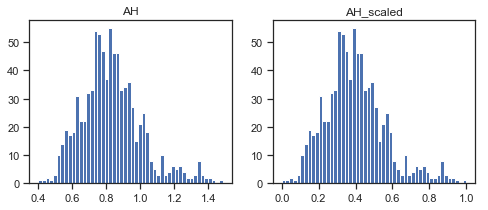

In [21]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

Целевой признак регрессии - поле AH.

In [22]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols
corr_cols_1

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [23]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['CO(GT)_scaled',
 'PT08.S1(CO)_scaled',
 'NMHC(GT)_scaled',
 'C6H6(GT)_scaled',
 'PT08.S2(NMHC)_scaled',
 'NOx(GT)_scaled',
 'PT08.S3(NOx)_scaled',
 'NO2(GT)_scaled',
 'PT08.S4(NO2)_scaled',
 'PT08.S5(O3)_scaled',
 'T_scaled',
 'RH_scaled',
 'AH_scaled']

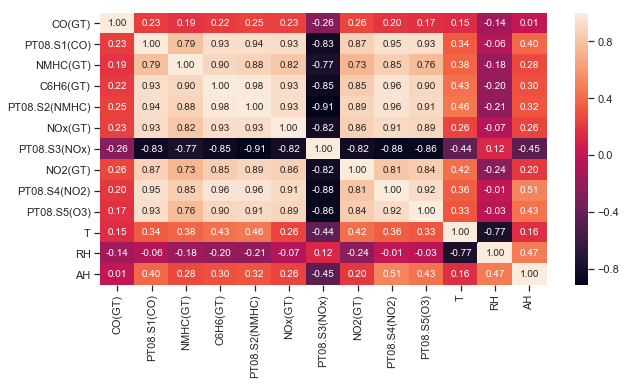

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

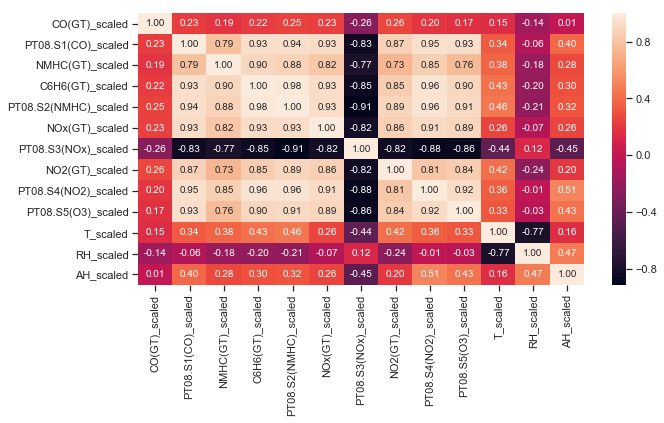

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак регрессии "AH" наиболее сильно коррелирует с PT08.S1(CO), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3), RH. Эти признаки обязательно следует оставить в модели классификации.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком.  На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения. 

## 5) Выбор метрик для последующей оценки качества моделей. 

### 5.1) В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### 1. Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### 2. Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### 3. Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### 4. Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### 5.2) В качестве метрик для решения задачи регрессии будем использовать:

#### 1. [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### 2. [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### 3. [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

#### 5.3) Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [26]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## 6) Выбор наиболее подходящих моделей для решения задачи регрессии.

Для задачи регрессии будем использовать следующие модели:
- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## 7) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [27]:
# На основе масштабированных данных выделим 
# обучающую и тестовую выборки с помощью фильтра
train_data_all, test_data_all = train_test_split(data, test_size=0.25, random_state=1)
train_data_all.shape, test_data_all.shape

((638, 28), (213, 28))

In [28]:
# Признаки для задачи регресии
task_regr_cols = ['PT08.S1(CO)_scaled', 'PT08.S3(NOx)_scaled', 'PT08.S4(NO2)_scaled', 'PT08.S5(O3)_scaled', 'RH_scaled']

In [29]:
# Выборки для задачи регресии
regr_X_train = train_data_all[task_regr_cols]
regr_X_test = test_data_all[task_regr_cols]
regr_Y_train = train_data_all['AH']
regr_Y_test = test_data_all['AH']
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((638, 5), (213, 5), (638,), (213,))

## 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### 8.1) Решение задачи регрессии

In [30]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [31]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [32]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    mse = mean_squared_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

In [33]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_base.py:547: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


*****************************************************
LinearRegression()

MAE=0.105, MSE=0.018, R2=0.535
*****************************************************
*****************************************************
KNeighborsRegressor()

MAE=0.094, MSE=0.016, R2=0.576
*****************************************************
*****************************************************
SVR()

MAE=0.09, MSE=0.015, R2=0.621
*****************************************************
*****************************************************
DecisionTreeRegressor()

MAE=0.105, MSE=0.023, R2=0.399
*****************************************************
*****************************************************
RandomForestRegressor()

MAE=0.092, MSE=0.016, R2=0.585
*****************************************************
*****************************************************
GradientBoostingRegressor()

MAE=0.095, MSE=0.017, R2=0.568
*****************************************************


## 9) Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

### 9.1) Пример для задачи регрессии

In [34]:
n_range = np.array(range(1,500,50))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451])}]

In [35]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 441 ms, sys: 19.4 ms, total: 461 ms
Wall time: 354 ms


In [36]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=51)

In [37]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 51}

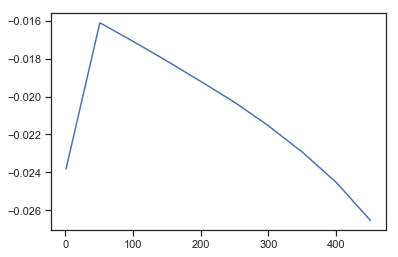

In [38]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

## 10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### 10.1) Решение задачи регрессии

In [39]:
regr_models_grid = {'KNN_801':regr_gs.best_estimator_}

In [40]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
KNeighborsRegressor(n_neighbors=51)

MAE=0.108, MSE=0.021, R2=0.448
*****************************************************


## 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

### 11.1) Решение задачи регрессии

In [41]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

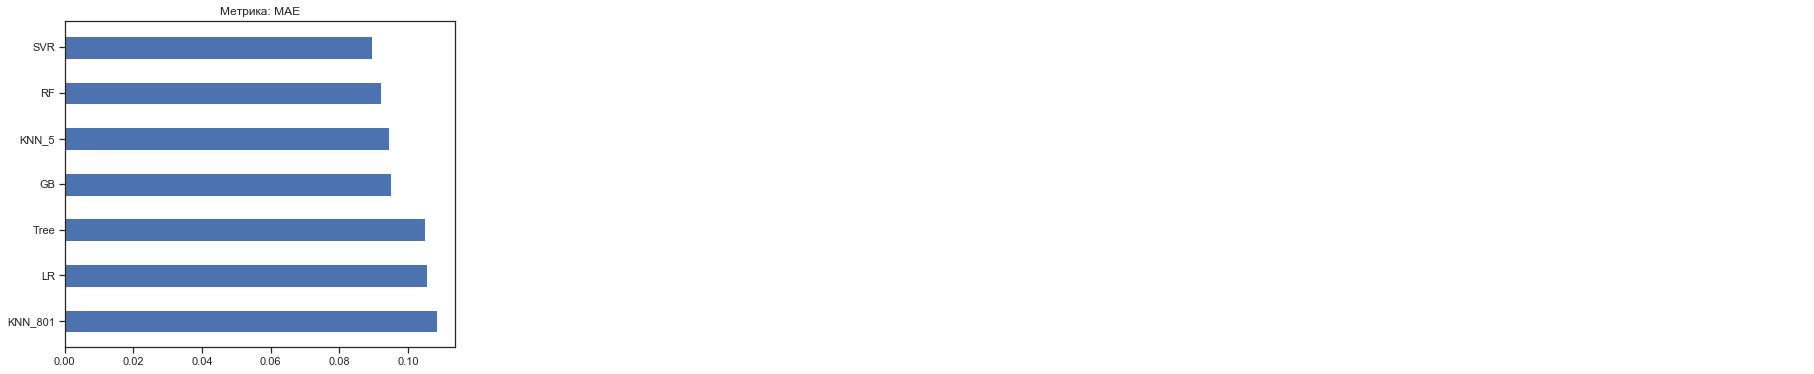

In [42]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

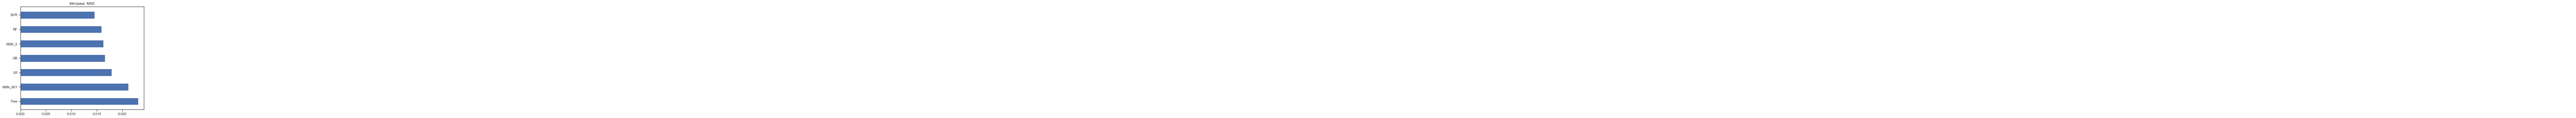

In [43]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

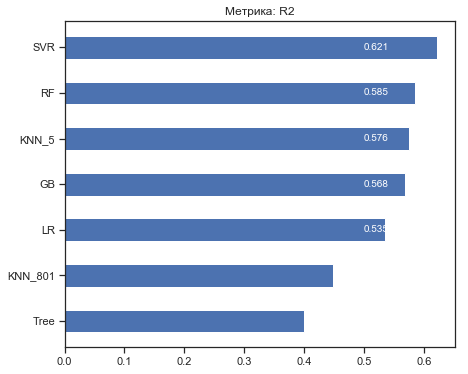

In [44]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

### Вывод: лучшей оказалась модель на основе метода опорных векторов.